In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal
from sklearn.cluster import KMeans
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')

#Clean original data
#df = pd.read_csv("LAPD_RIPA__AB_953__STOP_Person_Detail_from_7_1_2018_to_Present.csv", low_memory=True, dtype=str)
# the list that contains all the dataframes
#list_of_dataframes = []

#for df in pd.read_csv('LAPD_RIPA__AB_953__STOP_Person_Detail_from_7_1_2018_to_Present.csv', chunksize=5000, dtype=str, low_memory=True, engine='python', encoding='utf-8'):
#    list_of_dataframes.append(df)

#df = pd.concat(list_of_dataframes)

#df['Stop_Year'] = df['Stop Date']
#df['Stop_Year'] = df['Stop_Year'].str.split(' ').str[0]
#df['Stop_Year'] = df['Stop_Year'].str.slice(start=6)
#counts = df['Stop_Year'].value_counts().to_dict()
#df['Stop_Year'] = df['Stop_Year'].astype(int)

#if need 2023 year data 
#df = df2023
#df2023 = df.drop(df[(df.Stop_Year < 2023)].index)

#df = df.drop(df[(df.Stop_Year == 2023)].index)
#df.groupby('Stop_Year', group_keys=False).apply(lambda x: x.sample(4000))

#if need 2023 year data 
#df_merged = df.append(df2, ignore_index=True)
#df.to_csv('dataset.csv', encoding='utf-8', index=True)


Above is code that we have used to do stratified random sampling taking 4000 sample entries/rows from each year (2018,2019,2020,2021,2022). 2023 is year that this dataset had very few entries of, so that was removed.

In [588]:
#Cleaning Data
#Read in cleaned dataset
df = pd.read_csv("subdata.csv", dtype=str)

#Change string values of Yes and No to 0 and 1
df = df.loc[:,:].replace('Yes', '1')
df = df.loc[:,:].replace('No', '0')

#Remove unused columns
df.drop('Person ID', axis = 1, inplace = True)
df.drop('Form Reference Number', axis=1, inplace=True)
df.drop('Pretext', axis=1, inplace=True)
df.drop('Student', axis=1, inplace=True)
df.drop('Type of Stop', axis=1, inplace=True) 
df.drop('Offense Code', axis=1, inplace=True)
df.drop('Education Code Section', axis=1, inplace=True)
df.drop('Education Code Subdivision', axis=1, inplace=True)
df.drop('Waring Offense Code', axis=1, inplace=True) 
df.drop('In-Field Cite Offense Code', axis=1, inplace=True)
df.drop('Result of Stop: Referral to School Administrator', axis=1, inplace=True)
df.drop('Result of Stop: Referral to School Counselor or Other Support Staff', axis=1, inplace=True)
df.drop('Offense Type/Statute', axis=1, inplace=True) 
df.drop('Consent Granted Person', axis=1, inplace=True)
df.drop('Consent Granted Property', axis=1, inplace=True) 
df.drop('Action Taken: Vehicle Impound', axis=1, inplace=True)
df.drop('Action Taken: Admission or Written Statement Obtained from Student', axis=1, inplace=True)
df.drop('Result of Stop: Infraction Offense Statute', axis=1, inplace=True)
df.drop('Arrest Offense Code', axis=1, inplace=True)
df.drop('Property Seized: Firearm(s)', axis=1, inplace=True)
df.drop('Basis for Search: Suspected Violation of School Policy', axis=1, inplace=True)
df.drop('Basis for Property Seizure: Suspected violation of school policy', axis=1, inplace=True)

#Writing the csv 
#df.to_csv('subdata.csv', encoding='utf-8', index=True)
# set index for every row
#df = df.reset_index()

In this block of code above, we have changed all the yes into 1 and no into 0 to turn it into numerical data. Also, we have removed all the columns we are not using for this final project.

Now we will first combine the cloumns of races to one column by giving each race a number 

In [589]:
#Harsh here

df = df.loc[:,:].replace('Yes', '1')
df = df.loc[:,:].replace('No', '0')

df['Perceived: Asian'] = df['Perceived: Asian'].str.replace('1', 'A')
df['Perceived: Black/African American'] = df['Perceived: Black/African American'].str.replace('1', 'B')
df['Perceived: Hispanic/Latino(a)'] = df['Perceived: Hispanic/Latino(a)'].str.replace('1', 'H')
df['Perceived: Middle Eastern or South Asian'] = df['Perceived: Middle Eastern or South Asian'].str.replace('1', 'M')
df['Perceived: Native American'] = df['Perceived: Native American'].str.replace('1', 'N')
df['Perceived: Pacific Islander'] = df['Perceived: Pacific Islander'].str.replace('1', 'P')
df['Perceived: White'] = df['Perceived: White'].str.replace('1', 'W')

df['Perceived: Asian'] = df['Perceived: Asian'].str.replace('0', '')
df['Perceived: Black/African American'] = df['Perceived: Black/African American'].str.replace('0', '')
df['Perceived: Hispanic/Latino(a)'] = df['Perceived: Hispanic/Latino(a)'].str.replace('0', '')
df['Perceived: Middle Eastern or South Asian'] = df['Perceived: Middle Eastern or South Asian'].str.replace('0', '')
df['Perceived: Native American'] = df['Perceived: Native American'].str.replace('0', '')
df['Perceived: Pacific Islander'] = df['Perceived: Pacific Islander'].str.replace('0', '')
df['Perceived: White'] = df['Perceived: White'].str.replace('0', '')

racescol = ['Perceived: Asian','Perceived: Black/African American','Perceived: Hispanic/Latino(a)','Perceived: Middle Eastern or South Asian','Perceived: Native American','Perceived: Pacific Islander','Perceived: White']
df['Race'] = df[racescol].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

df['Race'] = df['Race'].str.replace('A', '1')
df['Race'] = df['Race'].str.replace('B', '2') 
df['Race'] = df['Race'].str.replace('H', '3')
df['Race'] = df['Race'].str.replace('M', '4')
df['Race'] = df['Race'].str.replace('N', '5')
df['Race'] = df['Race'].str.replace('P', '6')
df['Race'] = df['Race'].str.replace('W', '7')
df['Race'] = df['Race'].str[0]
df['Race'] = df['Race'].astype(int)


revisedData = df[['Race','Area ID','Perceived: AGE', 'Basis for Stop', 'Stop_Year', 'Action Taken: None' ,'Stop Time','Result of Stop: No Action','Result of Stop: Warning','Result of Stop: Citation for infraction','Result of Stop: In-field cite and release','Result of Stop: Custodial Arrest Pursuant to Outstanding Warrant','Result of Stop: Custodial Arrest Without Warrant','Result of Stop: Noncriminal Transport or Caretaking Transport','Result of Stop: Psychiatric Hold' ,'Result of Stop: Referred to U.S. Department of Homeland Security']]

revisedData.to_csv('datasetafterclean.csv', encoding='utf-8', index=True)


#For KMeans Clustering
kmeansdata = revisedData.copy()

#For EDA
mdf = revisedData.copy()

**Exploratory Data Analysis**

We'll first take a look at the Area IDs and see where most of the stops occur in the sample.
The Area ID is given to each city or district throughout Los Angeles County.
So we renamed all 21 Area IDs from digits to their actual identities.

In [590]:
mdf['Area ID'].replace(['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','99'],
                        ['Central','Rampart','Southwest','Hollenback','Harbor','Hollywood','Wilshire','West Los Angeles','Van Nus','West Valley','Northeast','77th Street','Newton','Pacific','North Hollywood','Foothill','Devonshire','Southeast','Mission','Olympic','Topanga','Other'], inplace=True)

mdf['Area ID']

0            77th Street
1                Central
2                 Newton
3              Southwest
4                Olympic
              ...       
19995            Mission
19996           Wilshire
19997    North Hollywood
19998          Hollywood
19999        West Valley
Name: Area ID, Length: 20000, dtype: object

,Stop_Year
Area ID,
77th Street,1680
Central,1369
Devonshire,740
Foothill,725
Harbor,781
Hollenback,771
Hollywood,897
Mission,890
Newton,1695


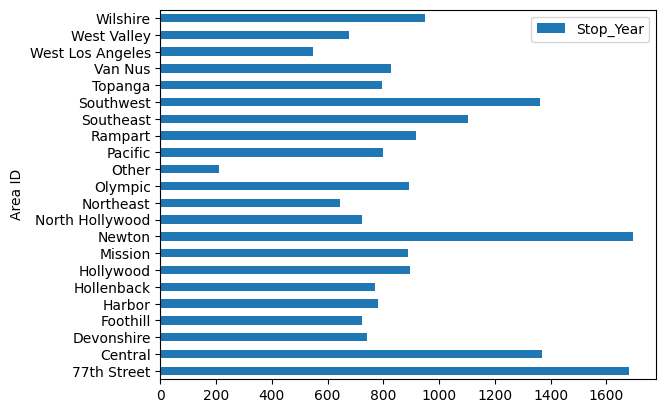

In [591]:
AreaCount = pd.pivot_table(data = mdf, values = 'Stop_Year', 
               index = 'Area ID', aggfunc = 'count')
                    
AreaCount.plot.barh()
AreaCount

We can see how the number of stops are distributed throughout Los Angeles County.
With Newton and 77th Street almost tying for the area with the most stops.
With a sample of twenty thousand, the data seems fair with an area not having a significant number of stops higher than the other.

,Stop_Year
Race,
Asian,663
Black,5266
Hispanic,9852
Middle Eastern,715
Native American,16
Pacific Islander,46
White,3442


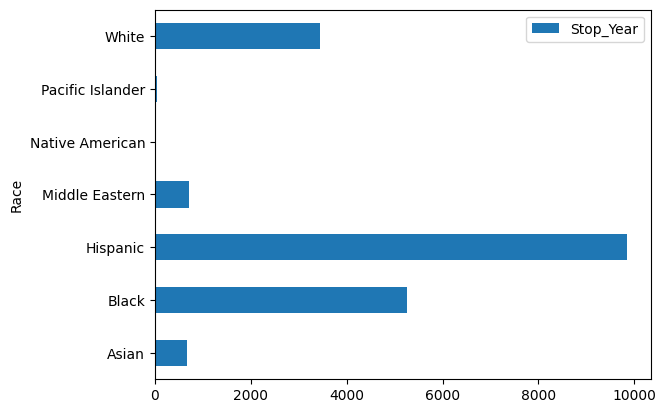

In [592]:
mdf['Race'].replace([1, 2, 3, 4, 5, 6, 7],
                        ['Asian', 'Black', 'Hispanic', 'Middle Eastern', 'Native American', 'Pacific Islander', 'White'], inplace=True)

RaceCount = pd.pivot_table(data = mdf, values = 'Stop_Year', 
               index = 'Race', aggfunc = 'count')
                    

RaceCount.plot.barh()
RaceCount

For future analysis with knn and k-means, the data was originally categorical but had to be turned to numerical.
For this we turn the data back to categorical and aggregate a count for each race in our sample.
Here we see one race significantly has more stops than the other races.
The count for each race could have been different with another sample or sampling method.

,Stop Time
Basis for Stop,
Actions indicative of a drug transaction,27
Actions indicative of casing a victim or location,9
Actions indicative of engaging in a violent crime,6
Carrying suspicious object,33
Matched suspect description,661
Officer witnessed commission of a crime,1933
Other reasonable suspicion of a crime,671
Suspected of acting as a lookout,8
Witness or victim identification of suspect at the scene,469


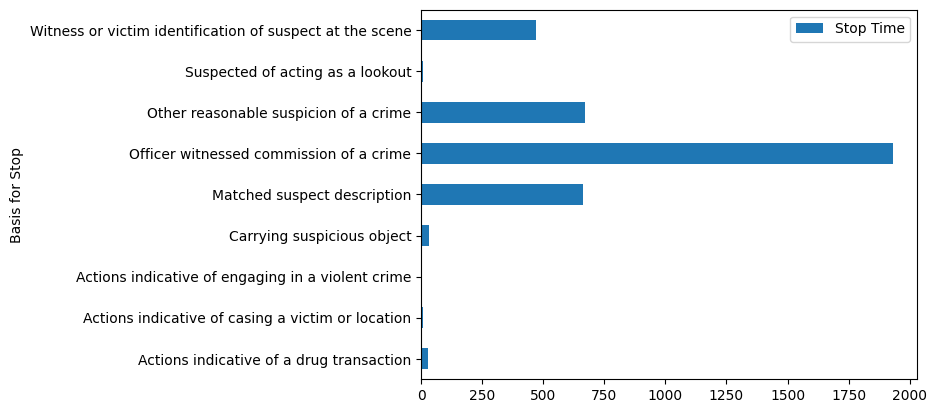

In [593]:
#mdf['Basis for Stop']

reason = pd.pivot_table(data = mdf, values = 'Stop Time', 
               index = 'Basis for Stop', aggfunc = 'count')
                    

reason.plot.barh()
reason

Before the analyzing, we were already under the assumption most of the stops were presumptious and wrong.
However, it seems that most of the stops that occur were justified because the officer had made the stop after witnessing a crime committed.
Followed and reinforced by 'matched suspect description' and 'witness or victim identification of suspect at the scene.'

In [594]:
mdf['Basis for Stop'].count()

3817

In [595]:
#Result of Stop: No Action
#Result of Stop: Warning
#Result of Stop: Citation for infraction
#Result of Stop: In-field cite and release
#Result of Stop: Custodial Arrest Pursuant to Outstanding Warrant
#Result of Stop: Custodial Arrest Without Warrant
#Result of Stop: Noncriminal Transport or Caretaking Transport
#Result of Stop: Psychiatric Hold
#Result of Stop: Referred to U.S. Department of Homeland Security

These lines of code converted the categorical data, Result of Stop(s), into numerical data and combined multiple columns into one column.
This is used for knn later on.

In [596]:
mdf['Result of Stop: No Action'] = mdf['Result of Stop: No Action'].str.replace('1', 'No Action')
mdf['Result of Stop: Warning'] = mdf['Result of Stop: Warning'].str.replace('1', 'Warning')
mdf['Result of Stop: Citation for infraction'] = mdf['Result of Stop: Citation for infraction'].str.replace('1', 'Citation for infraction')
mdf['Result of Stop: In-field cite and release'] = mdf['Result of Stop: In-field cite and release'].str.replace('1', 'In-field cite and release')
mdf['Result of Stop: Custodial Arrest Pursuant to Outstanding Warrant'] = mdf['Result of Stop: Custodial Arrest Pursuant to Outstanding Warrant'].str.replace('1', 'Custodial Arrest Pursuant to Outstanding Warrant')
mdf['Result of Stop: Custodial Arrest Without Warrant'] = mdf['Result of Stop: Custodial Arrest Without Warrant'].str.replace('1', 'Custodial Arrest Without Warrant')
mdf['Result of Stop: Noncriminal Transport or Caretaking Transport'] = mdf['Result of Stop: Noncriminal Transport or Caretaking Transport'].str.replace('1', 'Noncriminal Transport or Caretaking Transport')
mdf['Result of Stop: Psychiatric Hold'] = mdf['Result of Stop: Psychiatric Hold'].str.replace('1', 'Psychiatric Hold')
mdf['Result of Stop: Referred to U.S. Department of Homeland Security'] = mdf['Result of Stop: Referred to U.S. Department of Homeland Security'].str.replace('1', 'Referred to U.S. Department of Homeland Security')

mdf['Result of Stop: No Action'] = mdf['Result of Stop: No Action'].str.replace('0', '')
mdf['Result of Stop: Warning'] = mdf['Result of Stop: Warning'].str.replace('0', '')
mdf['Result of Stop: Citation for infraction'] = mdf['Result of Stop: Citation for infraction'].str.replace('0', '')
mdf['Result of Stop: In-field cite and release'] = mdf['Result of Stop: In-field cite and release'].str.replace('0', '')
mdf['Result of Stop: Custodial Arrest Pursuant to Outstanding Warrant'] = mdf['Result of Stop: Custodial Arrest Pursuant to Outstanding Warrant'].str.replace('0', '')
mdf['Result of Stop: Custodial Arrest Without Warrant'] = mdf['Result of Stop: Custodial Arrest Without Warrant'].str.replace('0', '')
mdf['Result of Stop: Noncriminal Transport or Caretaking Transport'] = mdf['Result of Stop: Noncriminal Transport or Caretaking Transport'].str.replace('0', '')
mdf['Result of Stop: Psychiatric Hold'] = mdf['Result of Stop: Psychiatric Hold'].str.replace('0', '')
mdf['Result of Stop: Referred to U.S. Department of Homeland Security'] = mdf['Result of Stop: Referred to U.S. Department of Homeland Security'].str.replace('0', '')


resultcol = [ 'Result of Stop: No Action','Result of Stop: Warning','Result of Stop: Citation for infraction','Result of Stop: In-field cite and release','Result of Stop: Custodial Arrest Pursuant to Outstanding Warrant','Result of Stop: Custodial Arrest Without Warrant','Result of Stop: Noncriminal Transport or Caretaking Transport','Result of Stop: Psychiatric Hold' ,'Result of Stop: Referred to U.S. Department of Homeland Security']
mdf['Result'] = mdf[resultcol].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

mdf['Result'] = mdf['Result'].str.replace('No Action', '1')
mdf['Result'] = mdf['Result'].str.replace('Warning', '2') 
mdf['Result'] = mdf['Result'].str.replace('Citation for infraction', '3')
mdf['Result'] = mdf['Result'].str.replace('In-field cite and release', '4') 
mdf['Result'] = mdf['Result'].str.replace('Custodial Arrest Pursuant to Outstanding Warrant', '5') 
mdf['Result'] = mdf['Result'].str.replace('Custodial Arrest Without Warrant', '6') 
mdf['Result'] = mdf['Result'].str.replace('Noncriminal Transport or Caretaking Transport' , '7')
mdf['Result'] = mdf['Result'].str.replace('Psychiatric Hold', '8') 
mdf['Result'] = mdf['Result'].str.replace('Referred to U.S. Department of Homeland Security', '9') 
mdf['Result'] = mdf['Result'].str[0]
#mdf['Result'] = mdf['Result'].astype(int)

mdf['Result']

0        NaN
1          1
2          2
3          3
4          3
        ... 
19995      1
19996      3
19997      4
19998      4
19999      3
Name: Result, Length: 20000, dtype: object

,Stop Time
Result,
Citation for Infraction,7662
Custodial Arrest Pursuant to Outstanding Warrant,445
Custodial Arrest Without Warrant,1580
In-field cite and release,489
No Action,2777
Noncriminal Transport or Caretaking Transport,46
Psychiatric Hold,241
Referred to U.S. Department of Homeland Security,2
Warning,5053


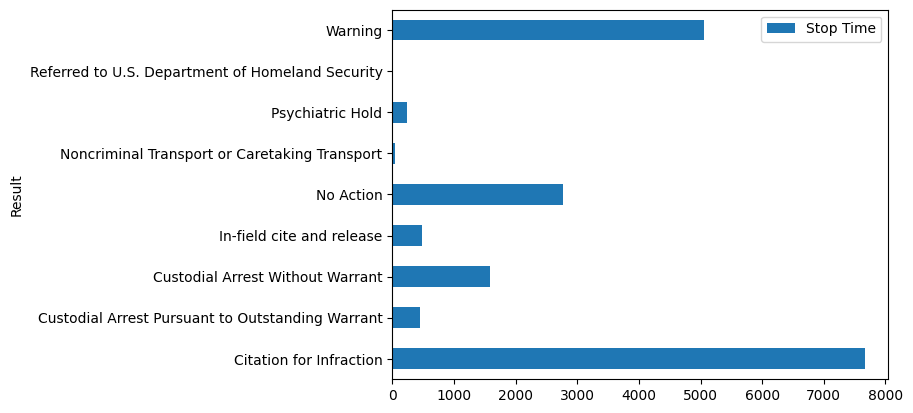

In [597]:
mdf['Result'].replace(['1', '2', '3', '4', '5', '6', '7', '8' ,'9'],
                        ['No Action', 'Warning', 'Citation for Infraction', 'In-field cite and release', 'Custodial Arrest Pursuant to Outstanding Warrant', 'Custodial Arrest Without Warrant', 'Noncriminal Transport or Caretaking Transport', 'Psychiatric Hold','Referred to U.S. Department of Homeland Security'], inplace=True)

result = pd.pivot_table(data = mdf, values = 'Stop Time', 
               index = 'Result', aggfunc = 'count')
                    

result.plot.barh()
result

To analyze the data for Result of stop, we convert the data back to categorical. 
It seems that most of the Result of stops end peacefully, with either a warning/no action or a citation given.
About 10% of the stops result in an arrests.
Extreme cases occur significantly less and are rare to occur.

In [598]:
pd.crosstab( mdf['Race'], mdf['Basis for Stop'], normalize=True, margins=True )

Basis for Stop,Actions indicative of a drug transaction,Actions indicative of casing a victim or location,Actions indicative of engaging in a violent crime,Carrying suspicious object,Matched suspect description,Officer witnessed commission of a crime,Other reasonable suspicion of a crime,Suspected of acting as a lookout,Witness or victim identification of suspect at the scene,All
Race,,,,,,,,,,
Asian,0.000262,0.000000,0.000000,0.000000,0.002358,0.010741,0.003668,0.000262,0.002096,0.019387
Black,0.002620,0.000786,0.000000,0.003930,0.045586,0.137805,0.053183,0.000000,0.034582,0.278491
Hispanic,0.002620,0.000786,0.001572,0.003930,0.082788,0.255436,0.090385,0.001310,0.059733,0.498559
Middle Eastern,0.000000,0.000262,0.000000,0.000000,0.002620,0.005764,0.002358,0.000000,0.002882,0.013885
Native American,0.000000,0.000000,0.000000,0.000000,0.000524,0.001310,0.000524,0.000000,0.000000,0.002358
Pacific Islander,0.000000,0.000000,0.000000,0.000262,0.000786,0.001834,0.000262,0.000000,0.001048,0.004192
White,0.001572,0.000524,0.000000,0.000524,0.038512,0.093529,0.025413,0.000524,0.022531,0.183128
All,0.007074,0.002358,0.001572,0.008646,0.173173,0.506419,0.175793,0.002096,0.122871,1.000000


Text(0.5, 1.0, 'Correlation between different columns')

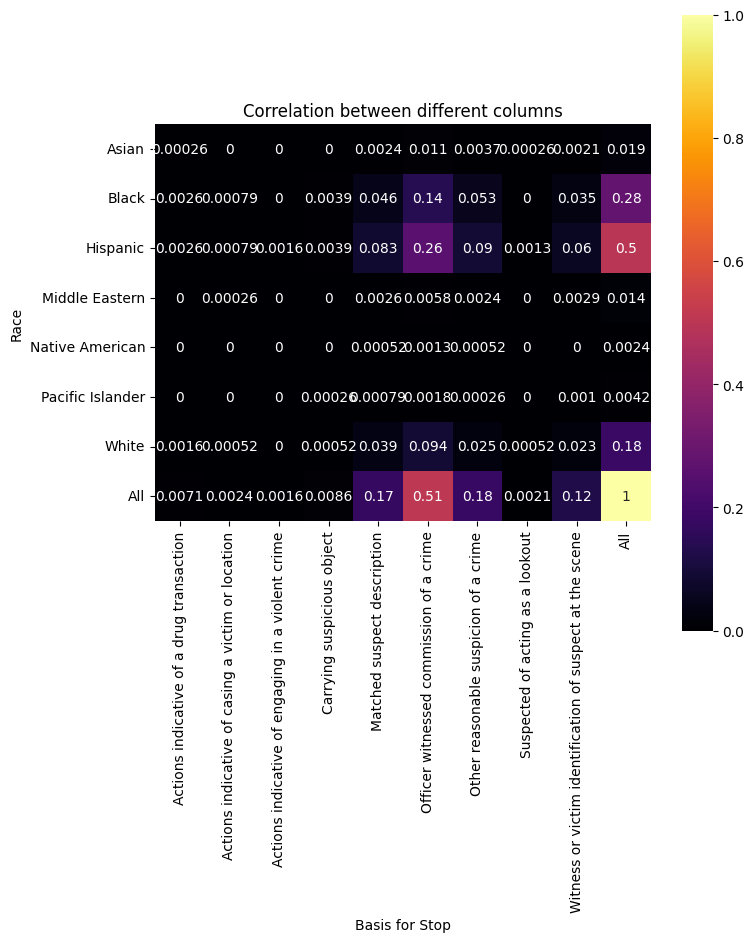

In [599]:
r = pd.crosstab( mdf['Race'], mdf['Basis for Stop'], normalize=True, margins=True )
plt.figure(figsize = (8,8))

g= sns.heatmap(r, vmax=1, square=True,annot=True,cmap='inferno')
plt.title('Correlation between different columns')

In [600]:
r = pd.crosstab( mdf['Area ID'], mdf['Race'], normalize=True, margins=True )
r

Race,Asian,Black,Hispanic,Middle Eastern,Native American,Pacific Islander,White,All
Area ID,,,,,,,,
77th Street,0.00015,0.05115,0.02975,0.00070,0.00005,0.00010,0.00210,0.08400
Central,0.00320,0.02340,0.02640,0.00235,0.00005,0.00025,0.01280,0.06845
Devonshire,0.00165,0.00280,0.01640,0.00365,0.00000,0.00005,0.01245,0.03700
Foothill,0.00055,0.00220,0.02670,0.00215,0.00000,0.00005,0.00460,0.03625
Harbor,0.00090,0.00480,0.02680,0.00035,0.00000,0.00010,0.00610,0.03905
Hollenback,0.00060,0.00165,0.03425,0.00040,0.00000,0.00000,0.00165,0.03855
Hollywood,0.00160,0.01335,0.01485,0.00220,0.00005,0.00000,0.01280,0.04485
Mission,0.00090,0.00310,0.03270,0.00240,0.00005,0.00005,0.00530,0.04450
Newton,0.00110,0.02435,0.05685,0.00030,0.00000,0.00005,0.00210,0.08475


Text(0.5, 1.0, 'Correlation between different column')

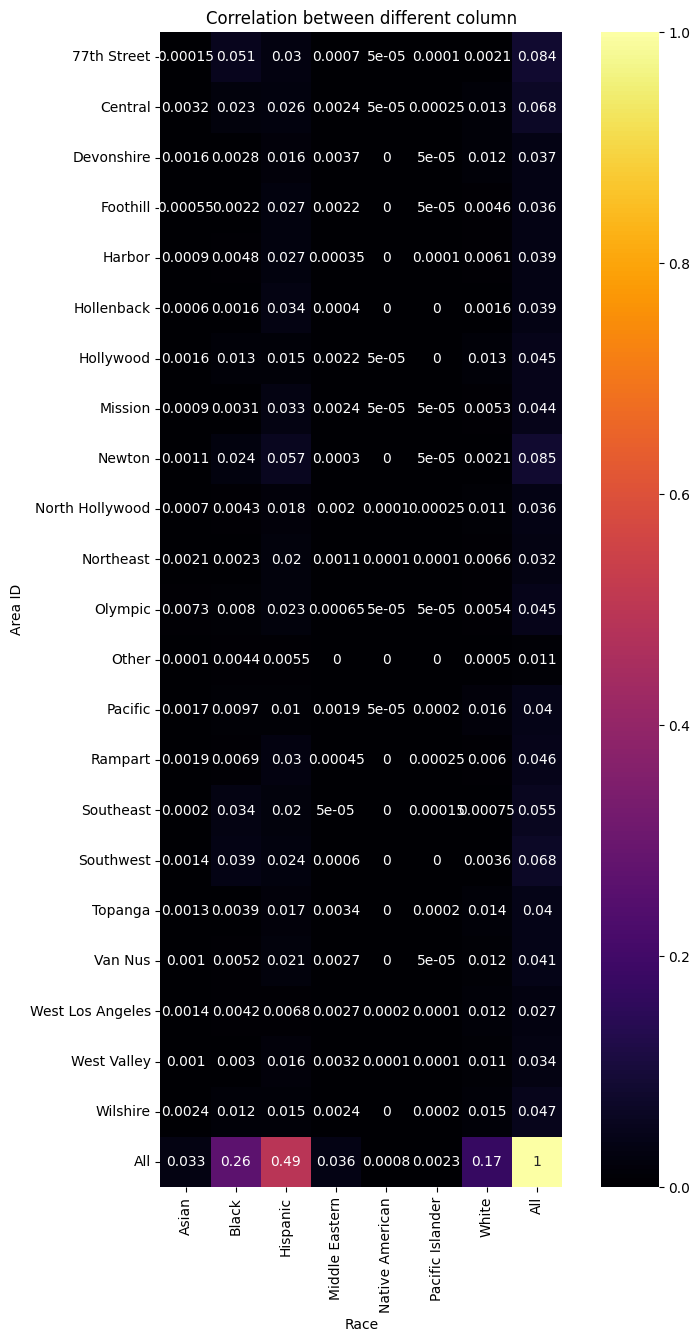

In [601]:
plt.figure(figsize = (10,15))

g= sns.heatmap(r, vmax=1, square=True,annot=True,cmap='inferno')
plt.title('Correlation between different column')

In [602]:
r = pd.crosstab( mdf['Basis for Stop'], mdf['Result'], normalize=True, margins=True )
r

Result,Citation for Infraction,Custodial Arrest Pursuant to Outstanding Warrant,Custodial Arrest Without Warrant,In-field cite and release,No Action,Noncriminal Transport or Caretaking Transport,Psychiatric Hold,Warning,All
Basis for Stop,,,,,,,,,
Actions indicative of a drug transaction,0.000000,0.000319,0.000958,0.000958,0.001917,0.000000,0.000000,0.000319,0.004473
Actions indicative of casing a victim or location,0.000000,0.000000,0.000000,0.000000,0.000639,0.000000,0.000000,0.000639,0.001278
Actions indicative of engaging in a violent crime,0.000000,0.000000,0.000000,0.000000,0.001278,0.000000,0.000000,0.000000,0.001278
Carrying suspicious object,0.000319,0.000639,0.001278,0.000319,0.006070,0.000000,0.000000,0.000639,0.009265
Matched suspect description,0.002236,0.011502,0.060383,0.002236,0.046326,0.001917,0.002875,0.020767,0.148243
Officer witnessed commission of a crime,0.140895,0.022684,0.071246,0.110224,0.062620,0.000958,0.000639,0.138019,0.547284
Other reasonable suspicion of a crime,0.012780,0.006709,0.032907,0.008307,0.065176,0.000958,0.000639,0.031310,0.158786
Suspected of acting as a lookout,0.000000,0.000000,0.000319,0.000319,0.000639,0.000000,0.000000,0.000000,0.001278
Witness or victim identification of suspect at the scene,0.003195,0.006070,0.087859,0.004153,0.012780,0.000000,0.001917,0.012141,0.128115


Text(0.5, 1.0, 'Correlation between different column')

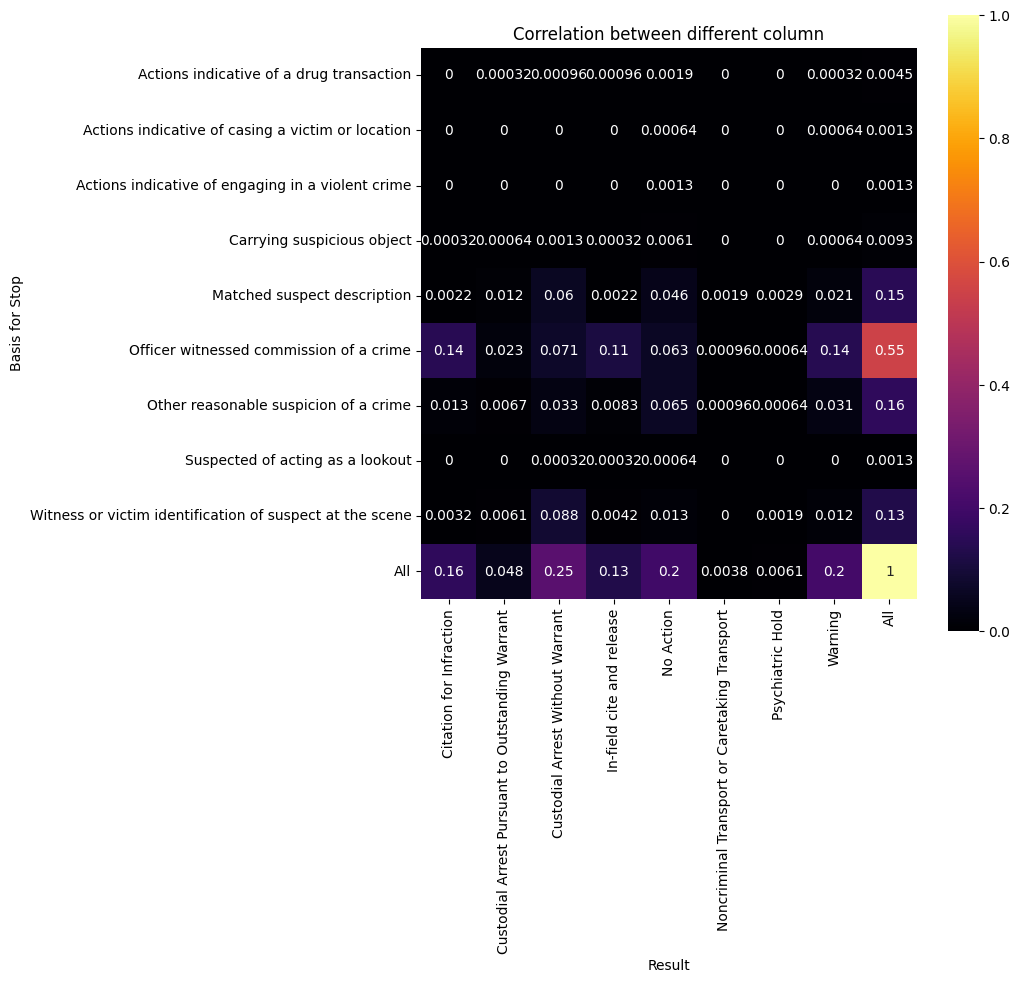

In [603]:
plt.figure(figsize = (8,8))

g= sns.heatmap(r, vmax=1, square=True,annot=True,cmap='inferno')
plt.title('Correlation between different column')

**KMeans Clustering**

Using our cleaned data, we will now identify clusters between specific areas and times of which people are commonly stopped by police. We will analyze this data using K-Means clustering using the columns 'Area ID' and 'Stop Time'. First, we need to make a few more changes to perform clustering on the data. We start by converting the values in 'Area ID' from a string to an int, then we change Area 99 to Area 22, so we can have more fluency within our data. Additionally, the stop time needs to be converted from a string to a decimal. Time will be represented from 0.00 - 23.99, with the decimal reprenting the minutes on the hour. So, 11:45 will be represented as 11.75. Below is scatter plot representing various stops using location and time.

<AxesSubplot: xlabel='Area ID', ylabel='Stop Time'>

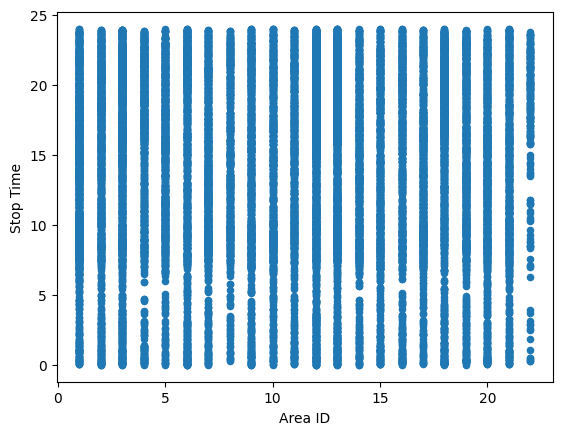

In [604]:
#K Means Clustering

#Convert Area ID from str to int
kmeansdata['Area ID'] = kmeansdata['Area ID'].astype(int)
kmeansdata['Area ID'] = kmeansdata['Area ID'].replace(99, 22)

#Convert Stop Time from string to decimal
stop_time_left = kmeansdata['Stop Time'].str.split(':').str[0]
stop_time_right = kmeansdata['Stop Time'].str.split(':').str[1]
stop_time_left = stop_time_left.astype(int)
stop_time_right = stop_time_right.astype(float)/60 #decimal / 60
kmeansdata['Stop Time'] = stop_time_left + stop_time_right
#End conversion

kmeansdata.plot.scatter(x="Area ID", y="Stop Time")

Looking at the sheer amount of data, it can be fairly difficult to detemine an appropriate K for our K-Means Clustering. So, to find our K, we will utilize the Elbow method.

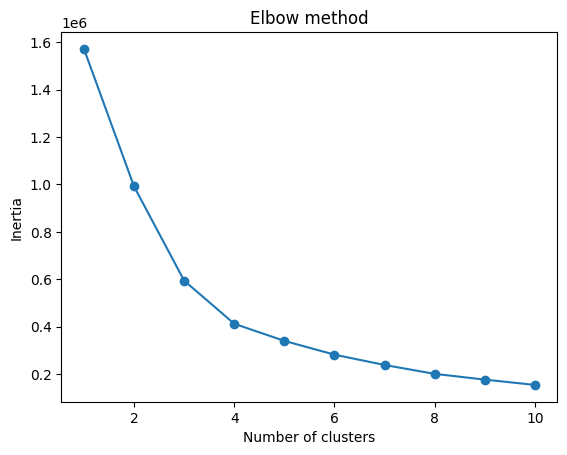

In [605]:
##Elbow Method
x = kmeansdata['Area ID']
y = kmeansdata['Stop Time']
data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
##End Elbow Method

Since we want to choose an odd K, this representation shows 3 as being our best choice for K. Now we perform K-Means Clustering.

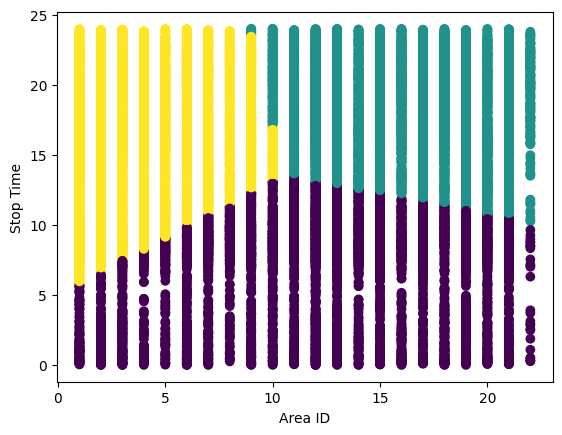

In [606]:
##K Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)
plt.xlabel('Area ID')
plt.ylabel('Stop Time')
plt.show()
##

From the data, we can see that the largest cluster of stops happens in the earlier half of the day while the smaller cluster of stops occur in the latter half.

**KNN (with KNeighborsRegressor)**

In [607]:
# Lin
# KNN (with KNeighborsRegressor)
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

df['Stop_Year'] = df['Stop_Year'].astype(float)
df['Perceived: AGE'] = df['Perceived: AGE'].astype(float)
df['Race'] = df['Race'].astype(float)
df['Area ID'] = df['Area ID'].astype(float)
df['Result of Stop: No Action'] = df['Result of Stop: No Action'].astype(float)
df['Result of Stop: Citation for infraction'] = df['Result of Stop: Citation for infraction'].astype(float)
df['Result of Stop: Custodial Arrest Without Warrant'] = df['Result of Stop: Custodial Arrest Without Warrant'].astype(float)
df['Action Taken: None'] = df['Action Taken: None'].astype(float)

#counts = df['Perceived: Gender'].value_counts().to_dict()
#counts
df["Perceived: Gender"].replace(["Female", "Male", "Transgender woman/girl",
    "Transgender man/boy", "Nonconforming"], [0, 1, 2, 3, 4], inplace=True)

df['Perceived: Gender'] = df['Perceived: Gender'].astype(int)



The above code, we simply convert the data from columns we selected to the float type.

In [608]:
# 8 features
X = df[["Race", "Stop_Year", "Area ID", "Perceived: Gender", "Result of Stop: No Action", "Result of Stop: Citation for infraction",
        "Result of Stop: Custodial Arrest Without Warrant","Action Taken: None"]]

#standardize y value 
#df["log(Perceived: AGE)"] = np.log10(df["Perceived: AGE"])
y = pd.DataFrame()
#y["log(Perceived: AGE)"] = df["log(Perceived: AGE)"]
y["Perceived: AGE"] = df["Perceived: AGE"]


#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=12000)

#standardize features
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()


The above code, we selected 8 independent variables to train and see what is their reason for stopping people. we selected AGE as the dependent variables and try to find the relationship between Xs and Y. (In addition to AGE, we can pick any other dependent variable Y to test the relationship)

The KNeighborsRegressor works with distances. And we have more than 1 feature, so if we want to better fit the model, we need to scale these features by standardization and then passing then into the model. (for bring all of the variables to the same scale)

MSE is:  12.874281986451386


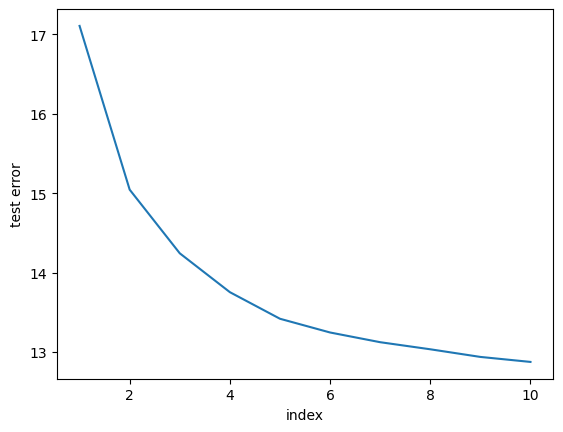

In [609]:
#create elbow curve to determine K
err = []
for K in range(10):
    K = K+1
    temp_model = neighbors.KNeighborsRegressor(n_neighbors = K)
    # fit model
    temp_model.fit(X_train, y_train) 
    pred=temp_model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) # test error
    err.append(error)
       
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(index, err)
plt.xlabel('index')
plt.ylabel('test error')

# MSE
print("MSE is: ", error)


The above code, we try to determine the best K for fitting the model by calculating the MSE. Then we are using elbow curve to find the huge reduction based on elbow plot.

In [610]:
# huge reduction at 3
K = 3
KNN = neighbors.KNeighborsRegressor(n_neighbors = K)
KNN.fit(X_train, y_train) 
KNN.predict(X_test)

array([[39.66666667],
       [32.66666667],
       [43.        ],
       ...,
       [31.        ],
       [47.        ],
       [23.33333333]])

The above code, by looking at the graph, we see there is a big reduction at K=3. So K=3 should be our N neighbors. Now we can use regressor to fit the model and make a prediction.

<AxesSubplot: xlabel='Race', ylabel='Perceived: AGE'>

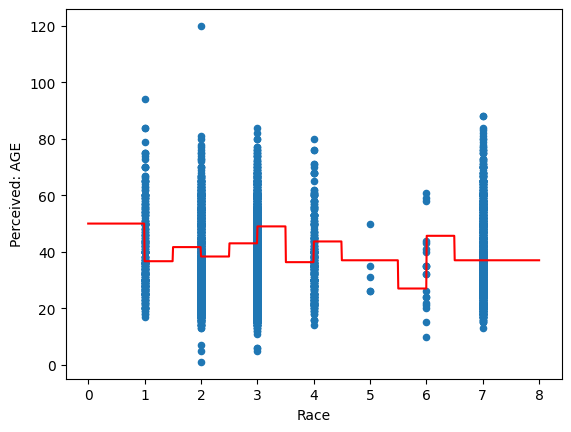

In [611]:
# Define a grid of feature values.
train, test = train_test_split(df, test_size = 0.6)

X_train_Race = train[["Race"]]
y_train_Race = train["Perceived: AGE"]

model = neighbors.KNeighborsRegressor(n_neighbors=K)
model.fit(X=X_train_Race, y=y_train_Race)

X_new = pd.DataFrame()
X_new["Race"] = np.linspace(0,8, num=1000)


y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Race"]
)

# Plot the predictions.
train.plot.scatter(x="Race", y="Perceived: AGE")
y_new_.plot.line(color = "red")

The above code, we need to evaluate the predictive model at a grid of feature values. For the Race range we converted is between 0 to 8, then we make predictions and plot these value as a curve.

<AxesSubplot: xlabel='Perceived: Gender', ylabel='Perceived: AGE'>

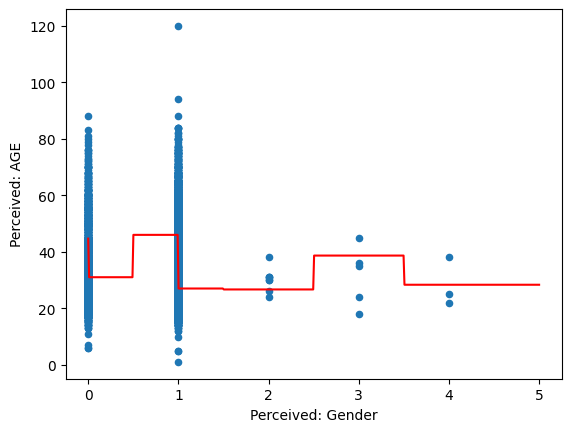

In [612]:
# Define a grid of feature values.
X_train_Area_ID = train[["Perceived: Gender"]]
y_train_Area_ID = train["Perceived: AGE"]

model = neighbors.KNeighborsRegressor(n_neighbors=K)
model.fit(X=X_train_Area_ID, y=y_train_Area_ID)

X_new = pd.DataFrame()
X_new["Perceived: Gender"] = np.linspace(0, 5, num=500)

y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["Perceived: Gender"]
)

# Plot the predictions.
train.plot.scatter(x="Perceived: Gender", y="Perceived: AGE")
y_new_.plot.line(color = "red")

Do the same thing as above, changing the feature. And the range.

<AxesSubplot: xlabel='Race', ylabel='Perceived: Gender'>

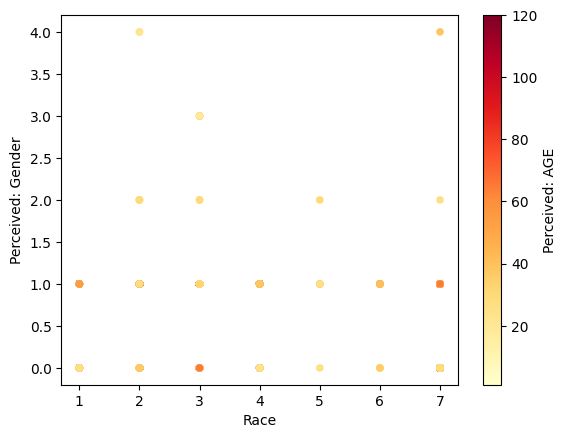

In [613]:
# visualize relationship between X and Y determine by c from yellow to red

#train.plot.scatter(x="Race", y="Perceived: Gender", c="log(Perceived: AGE)", cmap=cm.YlOrRd)
train.plot.scatter(x="Race", y="Perceived: Gender", c="Perceived: AGE", cmap=cm.YlOrRd)

Finally, we use scatter plot to show the relationship between Race and Perceived Gender. Also, use different color to indicate how many of these dots have the same or close color according to the (Perceived AGE). 

The same or similar color means they were stopped for the same/similar reason or feature.


**KNN for Race vs Area ID**

Below are the code cells we perform a KNN regressor just like above but for Race vs Area ID.

In [614]:
df['Area ID'] = df['Area ID'].replace(99,22)
# 8 features
X = df[["Race", "Stop_Year", "Perceived: AGE", "Perceived: Gender", "Result of Stop: No Action", "Result of Stop: Citation for infraction",
        "Result of Stop: Custodial Arrest Without Warrant","Action Taken: None"]]

#standardize y value 
#df["log(Perceived: AGE)"] = np.log10(df["Perceived: AGE"])
y = pd.DataFrame()
#y["log(Perceived: AGE)"] = df["log(Perceived: AGE)"]

y["Area ID"] = df["Area ID"]

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=12000)

#standardize features
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

MSE is:  6.465987614690685


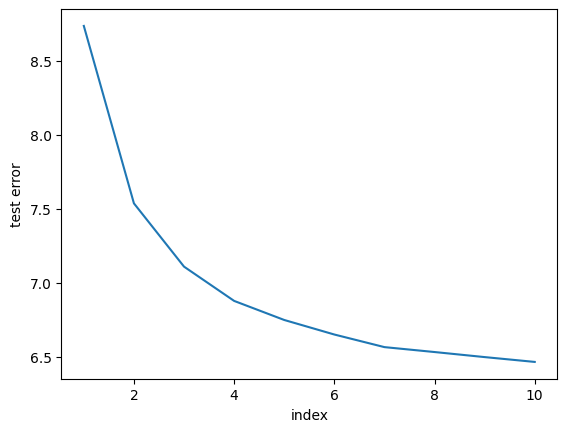

In [615]:
#create elbow curve to determine K
err = []
for K in range(10):
    K = K+1
    temp_model = neighbors.KNeighborsRegressor(n_neighbors = K)
    # fit model
    temp_model.fit(X_train, y_train) 
    pred=temp_model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) # test error
    err.append(error)
       
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(index, err)
plt.xlabel('index')
plt.ylabel('test error')

# MSE
print("MSE is: ", error)

In [616]:
# huge reduction at 3
K = 3
KNN = neighbors.KNeighborsRegressor(n_neighbors = K)
KNN.fit(X_train, y_train) 
KNN.predict(X_test)

array([[ 8.        ],
       [18.33333333],
       [14.        ],
       ...,
       [ 4.        ],
       [11.33333333],
       [ 9.33333333]])

<AxesSubplot: xlabel='Race', ylabel='Area ID'>

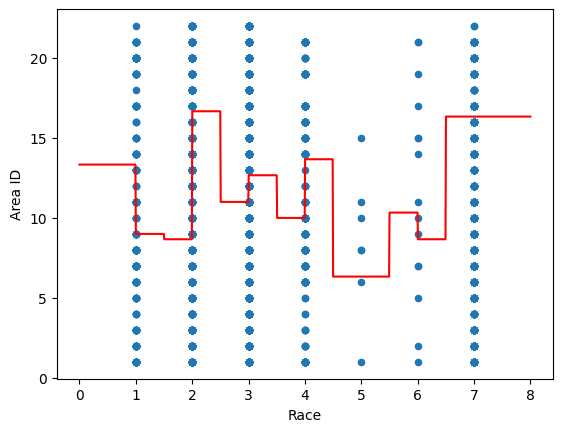

In [617]:
# Define a grid of feature values.
train, test = train_test_split(df, test_size = 0.6)

X_train_Race = train[["Race"]]
y_train_Race = train["Area ID"]

model = neighbors.KNeighborsRegressor(n_neighbors=K)
model.fit(X=X_train_Race, y=y_train_Race)

X_new = pd.DataFrame()
X_new["Race"] = np.linspace(0,8, num=1000)


ynew = pd.Series(
    model.predict(X_new),
    index=X_new["Race"]
)

# Plot the predictions.
train.plot.scatter(x="Race", y="Area ID")
ynew.plot.line(color = "red")